# Solar vs CV-lars-lasso and CV-cd simulations under $p>n$ (Simulation 2a, Section 4)

## This ipynb file produces the graphical and numerical results for Simulation 2a in section 4
## $\frac{p}{n}$ : $\frac{150}{50} \rightarrow \frac{200}{100} \rightarrow \frac{250}{150}$

---

# Check the following before running the code

## (a) Read "Read_Me_First.pdf" first, which introduces the package

## (b) Delete all .p files in the folder of this ipynb file. The .p files record the numerical results of the last computation.

## (c) To avoid confusion, reset your kernel before you running the notebook (to clear memory): Menu "Kernel" $\rightarrow$ "Restart Kernel and clear all outputs".

## (d) To evaluate the code for simulation replication,
## * click : Menu "Run" $\rightarrow$ "Run all cells"
## * or, select a cell of code, press "shift" and "enter". Run all cells to avoid errors

## (e) Check "scikit-learn", "numpy", "matplotlib" and "tqdm" are installed. If not,
## * run "pip install scikit-learn numpy matplotlib tqdm" in terminal (Mac OS or Linux) or command prompt as administrator (Windows) if you use Python3 without any IDE.
## * we highly recommend installing Anaconda3 version 19.03 directly to avoid unecessary package management (all packages mentioned above are installed by default).

---

## #1: import all modules

* "pickle" is used to save all computation results into ".p" files, which can be loaded later.

* For simplicity and elegancy, all relevant functions and classes are coded in "simul_plot.py".

    * "simul_plot_p_large.py" is for plotting and computation with different $n$ and $p$ when $p>n$.

    * See "simul_plot_p_large.py" for the details of the class settings   

In [1]:
import numpy as np

import pickle

from simul_plot_p_large import simul_plot

---

## #2: define all functions

### computation of the solar vs cv-lars and cv-cd comparison

In [2]:
def func_comp(sample_size, n_dim, n_info, n_repeat, num_rep, step_size, rnd_seed):
    
    print("compute the simulation with sample size "+str(sample_size)+" and number of variables "+str(n_dim))
    
    #set random seed
    np.random.seed(rnd_seed)

    #call function from the class
    trial = simul_plot(sample_size, n_dim, n_info, n_repeat, num_rep, step_size, rnd_seed)
    #compute the result
    opt_c_stack, Q_opt_c_stack, la_array_stack, la_var_stack, solar_coef_stack, cd_array_stack, cd_var_stack = trial.simul_func()

    #save all the computation result into "solar_graph_n_"+str(sample_size)+"_p_"+str(n_dim)+"_dell.p" files
    with open("solar_graph_n_"+str(sample_size)+"_p_"+str(n_dim)+"_dell.p", "wb") as f:
        pickle.dump( opt_c_stack      , f)
        pickle.dump( Q_opt_c_stack    , f)
        pickle.dump( la_array_stack   , f)
        pickle.dump( la_var_stack     , f)
        pickle.dump( cd_array_stack   , f)
        pickle.dump( cd_var_stack     , f)
        pickle.dump( solar_coef_stack , f)
        

### plot the result of the solar vs cv-lars and cv-cd comparison

In [3]:
def func_plot(sample_size, n_dim, n_info, n_repeat, num_rep, step_size, rnd_seed):
    
    #set random seed
    np.random.seed(rnd_seed)
    
    #call function from the class
    trial = simul_plot(sample_size, n_dim, n_info, n_repeat, num_rep, step_size, rnd_seed)
    
    #load the computation result from "solar_graph_n_"+str(sample_size)+"_p_"+str(n_dim)+"_dell.p" files
    with open("solar_graph_n_"+str(sample_size)+"_p_"+str(n_dim)+"_dell.p", "rb") as f:
        opt_c_stack      = pickle.load( f )
        Q_opt_c_stack    = pickle.load( f )
        la_array_stack   = pickle.load( f )
        la_var_stack     = pickle.load( f )
        cd_array_stack   = pickle.load( f )
        cd_var_stack     = pickle.load( f )
        solar_coef_stack = pickle.load( f )
    
    #plot the hist of number of variables selected of solar, cv-lars-lasso and cv-cd
    trial.vari_hist(Q_opt_c_stack, la_array_stack, cd_array_stack)
    
    #plot the optimal q value for all num_rep solar repeatations
    trial.q_hist(opt_c_stack)
    
    #plot the probability of each variable be selected by solar, cv-lars-lasso and cv-cd
    print_true_1 = False
    print_true_2 = True
    
    num_var_to_plot_1 = 15
    ##this is the maximum number of variables that can be plot in one graph
    
    trial.acc_plot(Q_opt_c_stack, la_var_stack, cd_var_stack, 20, print_true_1)
    trial.acc_plot(Q_opt_c_stack, la_var_stack, cd_var_stack, 20, print_true_2)
    trial.bl_vari_plot(solar_coef_stack, num_var_to_plot_1)
    

---

## #3: define inputs values

Considering the population regression equation $Y = X \overline{\beta} + e$, where $\overline{\beta} = \left[2, 3, 4, 5, 6, 0, \ldots, 0 \right]$ in our paper

* sample_size is the sample size $n$ in the paper;
* n_dim       is the total number of variables(informative + redundant) in $X$, $p$ in the paper;
* n_info      is the number of informative variables in $X$;
* n_repeat    is the number of subsamples generated by solar;
* num_rep     is the number of repeatation for solar, cv-lars and cv-cd
* step_size   is the step size for tuning $c$;
* rnd_seed    is the random seed value;

### To change the simulation settings, simply change the input values
### Note that if you change n_info you will have to adjust the DGP as follows:

* If $i > \mbox{n_info} - 1$ and $i \in \left[ 0, 1, 2, \ldots, p-1 \right]$, $\overline{\beta}_i = 0$
* If $i \leqslant \mbox{n_info} - 1$ and $i \in \left[ 0, 1, 2, \ldots, p-1 \right]$, $\overline{\beta}_i = i + 2$

In [4]:
n_info      = 5 
step_size   = -0.02 
n_repeat    = 10
num_rep     = 200
rnd_seed    = 0

sample_size_0  = 50  ; n_dim_0 = 150
sample_size_1  = 100 ; n_dim_1 = 200
sample_size_2  = 150 ; n_dim_2 = 250

---

## #4: compute solar, CV-lars-lasso and CV-cd

### This applies for replication only (numerical results will be saved as .p files) and can be skipped if you have already computed simulation results.

### Numpy, sklearn and python are actively updated. If you use different version, replication results may be slightly different from the paper (see Read_me_first.pdf for detail).

### To rerun this part, first delete all .p files in your working folder to avoid possible bug.

In [5]:
func_comp(sample_size_0, n_dim_0, n_info, n_repeat, num_rep, step_size, rnd_seed)

  0%|          | 0/200 [00:00<?, ?it/s]

compute the simulation with sample size 50 and number of variables 150


100%|██████████| 200/200 [01:03<00:00,  3.26it/s]


In [6]:
func_comp(sample_size_1, n_dim_1, n_info, n_repeat, num_rep, step_size, rnd_seed)

  0%|          | 0/200 [00:00<?, ?it/s]

compute the simulation with sample size 100 and number of variables 200


100%|██████████| 200/200 [01:52<00:00,  1.71it/s]


In [7]:
func_comp(sample_size_2, n_dim_2, n_info, n_repeat, num_rep, step_size, rnd_seed)

  0%|          | 0/200 [00:00<?, ?it/s]

compute the simulation with sample size 150 and number of variables 250


100%|██████████| 200/200 [03:08<00:00,  1.09it/s]


---

## #5: plot the results

## The background of some figures is transparent. Turn off the dark theme in Jupyter notebook or Jupyter lab to avoid unreadable labels

## Check "Read_me_first.pdf" for the version of the python package. Using another version may produce slightly different results to the paper.

### case #1: $n = 50, p =150$

### plot the results

The available results are:

* histogram of number of variables selected by solar, CV-cd and CV-lars-lasso
* histogram of optimal $c$ value for $\left\{ \mathbf{x}_j \; \vert \; \widehat{q}_j \geqslant c \right\}$ in all 200 repetitions of solar computation on different samples
* probability of selecting each redundant variable in solar, CV-cd and CV-lars-lasso (top 15 by probability)
* probability of selecting each informative variable in solar, CV-cd and CV-lars-lasso
* the boxplot of regression coefficients of solar (top 15 means)

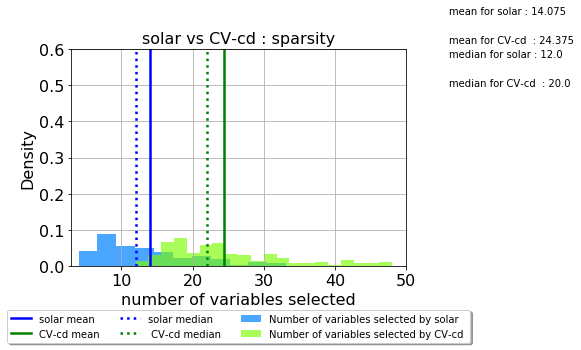

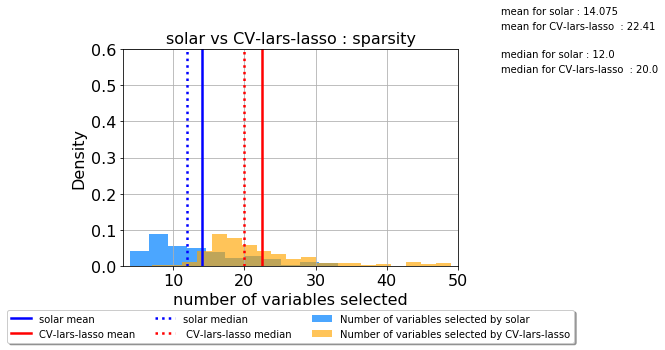

in 192 out of 200 solar pick more/less than 5 variables
in 200 out of 200 CV-lars-lasso  pick more/less than 5 variables
in 200 out of 200 CV-cd pick more/less than 5 variables


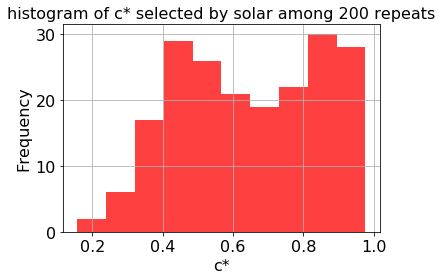

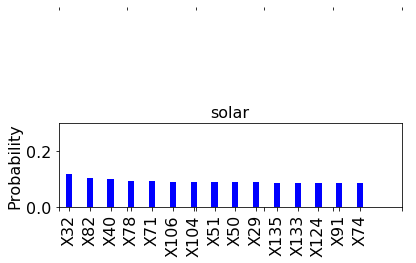

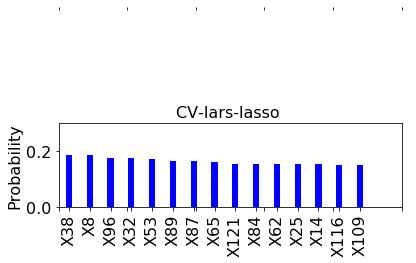

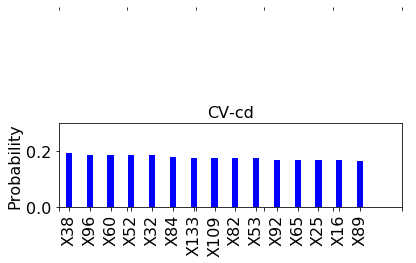

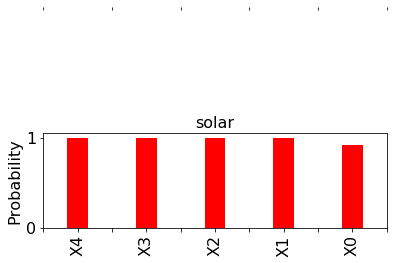

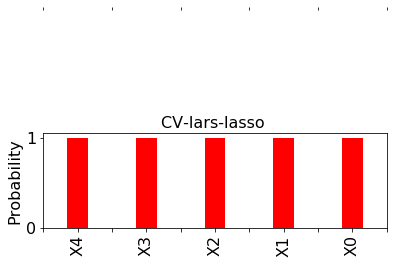

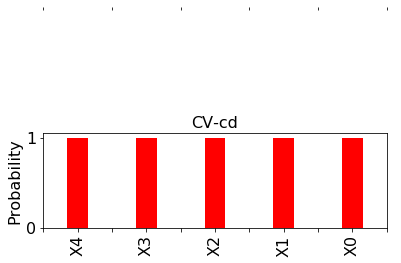

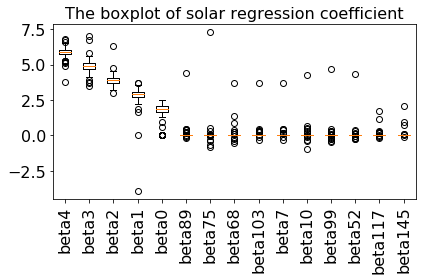

the number of non-zeros in the boxplot of beta_0:  184
the number of non-zeros in the boxplot of beta_1:  199
the number of non-zeros in the boxplot of beta_2:  200
the number of non-zeros in the boxplot of beta_3:  200
the number of non-zeros in the boxplot of beta_4:  200


In [8]:
func_plot(sample_size_0, n_dim_0, n_info, n_repeat, num_rep, step_size, rnd_seed)

### case #2: $n = 100, p =200$

### plot the results

The available results are:

* histogram of number of variables selected by solar, CV-cd and CV-lars-lasso
* histogram of optimal $c$ value for $\left\{ \mathbf{x}_j \; \vert \; \widehat{q}_j \geqslant c \right\}$ in all 200 repetitions of solar computation on different samples
* probability of selecting each redundant variable in solar, CV-cd and CV-lars-lasso (top 15 by probability)
* probability of selecting each informative variable in solar, CV-cd and CV-lars-lasso
* the boxplot of regression coefficients of solar (top 15 means)

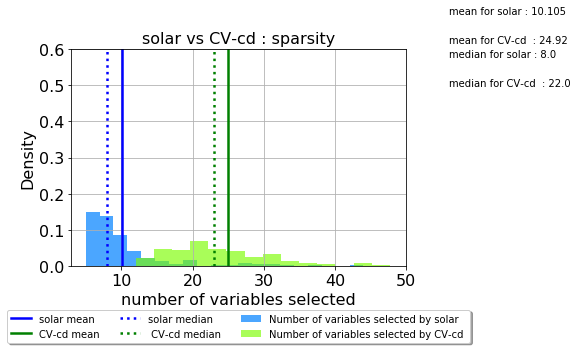

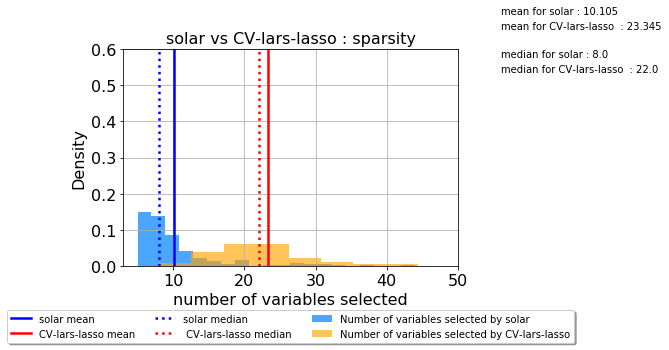

in 177 out of 200 solar pick more/less than 5 variables
in 200 out of 200 CV-lars-lasso  pick more/less than 5 variables
in 200 out of 200 CV-cd pick more/less than 5 variables


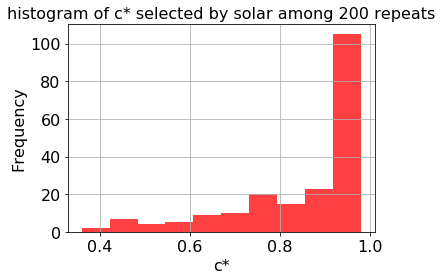

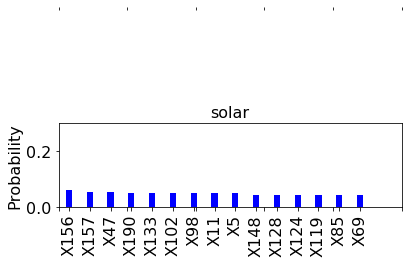

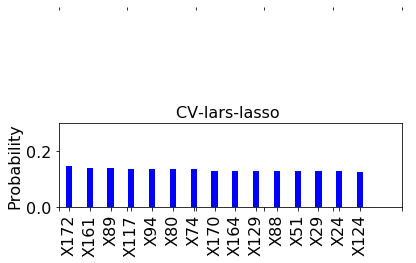

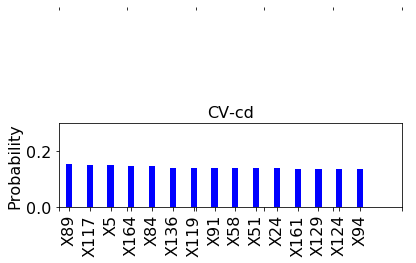

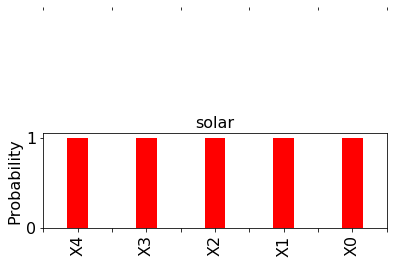

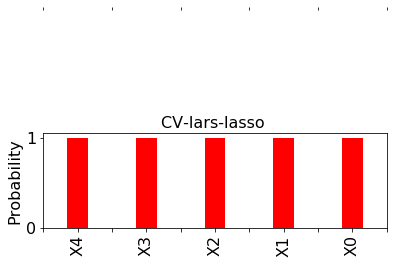

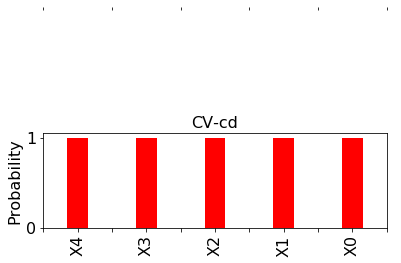

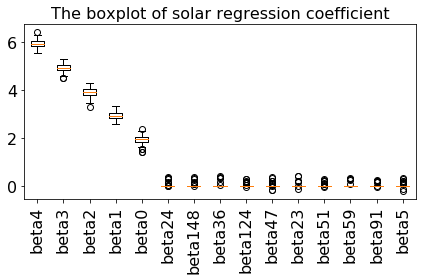

the number of non-zeros in the boxplot of beta_0:  200
the number of non-zeros in the boxplot of beta_1:  200
the number of non-zeros in the boxplot of beta_2:  200
the number of non-zeros in the boxplot of beta_3:  200
the number of non-zeros in the boxplot of beta_4:  200


In [9]:
func_plot(sample_size_1, n_dim_1, n_info, n_repeat, num_rep, step_size, rnd_seed)

### case #3: $n = 150, p =250$

### plot the results

The available results are:

* histogram of number of variables selected by solar, CV-cd and CV-lars-lasso
* histogram of optimal $c$ value for $\left\{ \mathbf{x}_j \; \vert \; \widehat{q}_j \geqslant c \right\}$ in all 200 repetitions of solar computation on different samples
* probability of selecting each redundant variable in solar, CV-cd and CV-lars-lasso (top 15 by probability)
* probability of selecting each informative variable in solar, CV-cd and CV-lars-lasso
* the boxplot of regression coefficients of solar (top 15 means)

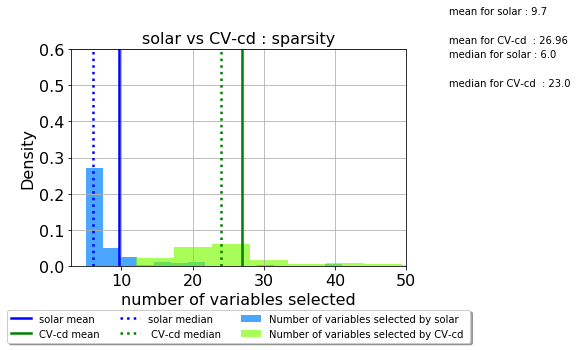

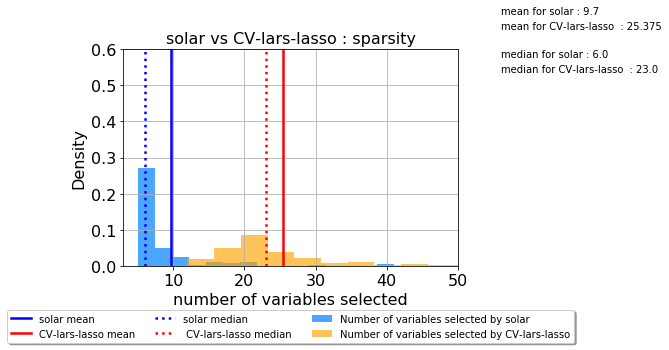

in 111 out of 200 solar pick more/less than 5 variables
in 200 out of 200 CV-lars-lasso  pick more/less than 5 variables
in 200 out of 200 CV-cd pick more/less than 5 variables


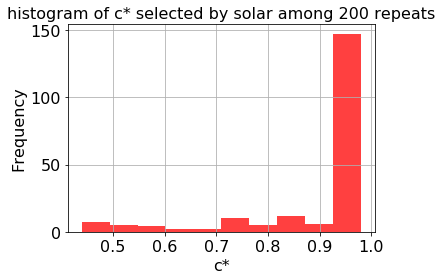

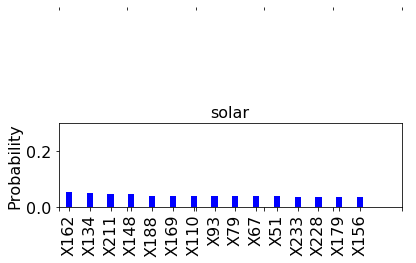

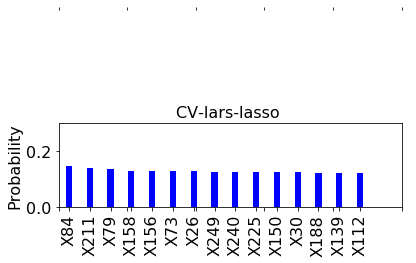

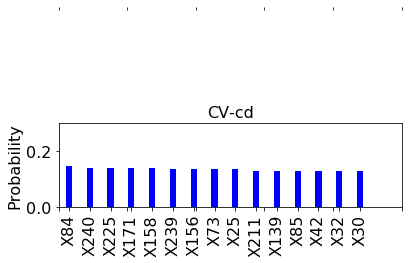

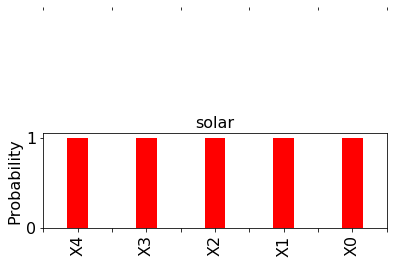

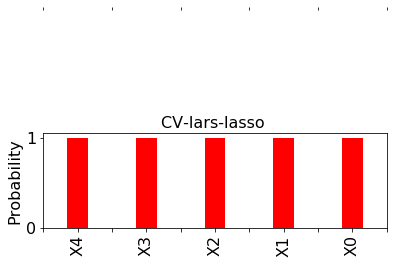

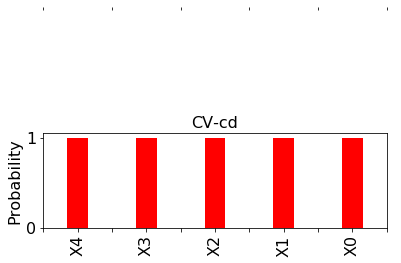

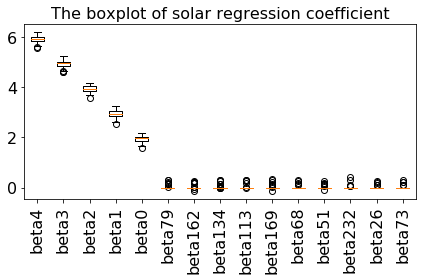

the number of non-zeros in the boxplot of beta_0:  200
the number of non-zeros in the boxplot of beta_1:  200
the number of non-zeros in the boxplot of beta_2:  200
the number of non-zeros in the boxplot of beta_3:  200
the number of non-zeros in the boxplot of beta_4:  200


In [10]:
func_plot(sample_size_2, n_dim_2, n_info, n_repeat, num_rep, step_size, rnd_seed)